## Observations and Insights 

<h4>Key Insights:</h4>
<ul>
    <li>Among the four promising drug candidates it appears clear that Capomulin and Ramicane on average result in significantly smaller final tumor volumes. For most of the Capomulin mice there is a clear negative trend for their tumor volumes over time showing the effectiveness of the treatment.</li>
   <li>One interesting insight is the the difference in the variance of the different drug regimens. Each of the drug regimens and the placebo have nearly identical variances. However, the Capomulin has a much lower variance. This may indicate that there is some difference between this drug regimen and the others. One potential result is that this drug brings the tumor down to a specific critical threshold which the datapoints cluster around.</li>
   <li>There is a clear trend showing that increased mouse weight is correlated with increased average tumor volume (R = 0.84). An interesting further study would be to evaluate whether losing weight alone would cause a decrease in tumor size in these mice on the Capomulin regimen.</li>
    
</ul>

In [21]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np
import random


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
summative_df = mouse_metadata.merge(study_results, how = 'outer', on = 'Mouse ID')
# Display the data table for preview
summative_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
summative_df['Mouse ID'].value_counts().count()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

# This generates a boolean Series based upon whether the row contains a duplicate in the two given columns
repeats = summative_df.duplicated(['Mouse ID','Timepoint'],keep="first")

# Optional: Get all the data for the duplicate mouse ID.
# dup_df is the dataframe which contains all of the data from the duplicate mice
dup_df = summative_df[repeats]

# Gets the unique Mouse IDs from the duplicate dataframe and print them out
dup_mice = dup_df['Mouse ID'].unique()


In [19]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# This loops through the duplicate dataframe and edits summative_df to remove all data from that mouse
# In this case there is only one mouse, but it would work if there were any number of mice with duplicates
for i in range(len(dup_mice)):
    summative_df = summative_df.loc[summative_df['Mouse ID'] != dup_mice[i],:]
    print(dup_mice[i])
    


g989


In [5]:
# Checking the number of mice in the clean DataFrame.
# Display the number of mice that have duplicates and the number remaining after removal of these mice
print(len(dup_mice))
summative_df['Mouse ID'].value_counts().count()

1


248

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

# Take the mean of the first column and creating a dataframe
sum_stat_df = summative_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean().to_frame()

#Rename the first column
sum_stat_df = sum_stat_df.rename(columns = {'Tumor Volume (mm3)': 'Mean'})

# Populate the rest of the table
sum_stat_df['Median'] = summative_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
sum_stat_df['Variance'] = summative_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
sum_stat_df['Standard Deviation'] = summative_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
sum_stat_df['Standard Error of the Mean'] = summative_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()

sum_stat_df


,Mean,Median,Variance,Standard Deviation,Standard Error of the Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
# WOW this is a really valuable method to know.
second_stat_df = summative_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean','median','var', 'std', 'sem'])
second_stat_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

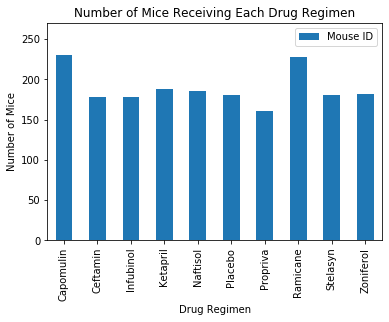

In [22]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
# This row does a lot of work at once
# It groups the original dataframe by drug regimen by count, creates a dataframe, and bumps the index into a column
grouped_df = summative_df.groupby('Drug Regimen')['Mouse ID'].count().to_frame().reset_index()

# Then we plot a bar graph to visualize the number of mice in each regimen
grouped_df.plot(x='Drug Regimen', y = 'Mouse ID', kind = 'bar')
plt.ylabel('Number of Mice')
plt.ylim([0,grouped_df['Mouse ID'].max() + 40])
plt.title('Number of Mice Receiving Each Drug Regimen')
plt.show()

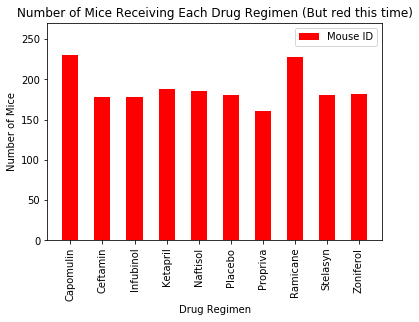

In [25]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
plt.bar(grouped_df['Drug Regimen'],grouped_df['Mouse ID'], color = 'red',width = 0.5, label = 'Mouse ID')
plt.xticks(rotation = 90)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice')
plt.ylim([0,grouped_df['Mouse ID'].max() + 40])
plt.title('Number of Mice Receiving Each Drug Regimen (But red this time)')
plt.legend()
plt.show()

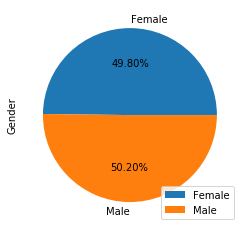

In [29]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Obtain a dataframe with one row for all unique mouse IDs
gender_df = summative_df.drop_duplicates('Mouse ID')

# Count up the number of each gender and create a dataframe
gender_df = gender_df.groupby('Sex')['Mouse ID'].count().to_frame()

# Rename the column to Gender
gender_df = gender_df.rename(columns = {'Mouse ID': 'Gender'})

# Pie chart automatically assumes 'Sum of column is the total to divide each value by'
# Autopct adds in the percentage labels
gender_df.plot(y = 'Gender',kind = 'pie', autopct='%1.2f%%')

# Move the legend for readability
plt.legend(loc = 'lower right')
plt.show()


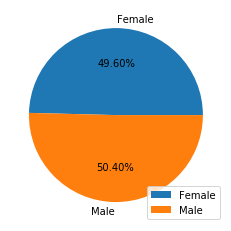

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Pass the series in as our values, assign titles to each slice, and format the string
plt.pie(gender_df['Gender'], labels = ['Female','Male'], autopct='%1.2f%%')
plt.legend(loc = 'lower right')
plt.show()

## Quartiles, Outliers and Boxplots

In [30]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Use a smaller dataframe which only contains the treatement regimens we're interested in
reduced_df = summative_df.loc[(summative_df['Drug Regimen'] == 'Capomulin') \
                              | (summative_df['Drug Regimen'] == 'Ramicane') \
                              | (summative_df['Drug Regimen'] == 'Infubinol') \
                              | (summative_df['Drug Regimen'] == 'Ceftamin'), :]

# Bump Mouse ID into the index column so it can be used as a 'level' in the next command
reduced_df = reduced_df.set_index('Mouse ID')

# Start by getting the last (greatest) timepoint for each mouse
max_df = reduced_df['Timepoint'].max(level = 'Mouse ID').to_frame()

# Sort the dataframe if desired for visualization
max_df = max_df.sort_values('Timepoint', ascending = False)



# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
# Merge on both columns so you are left with only the max timepoint rows
result_df = reduced_df.merge(max_df, on = ['Mouse ID','Timepoint'])
result_df

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,45,22.050126,1
s185,Capomulin,Female,3,17,45,23.343598,1
x401,Capomulin,Female,16,15,45,28.484033,0
m601,Capomulin,Male,22,17,45,28.430964,1
g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...
x822,Ceftamin,Male,3,29,45,61.386660,3
y163,Infubinol,Female,17,27,45,67.685569,3
y769,Ceftamin,Female,6,27,45,68.594745,4


In [32]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Made this a dictionary so that each set of tumor values could be stored separately



# Create empty list to fill with tumor vol data (for plotting)
# Create a list of empty lists with one for each drug
tumor_vol = [[] for i in range(len(treatments))]


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
inter_quartile_ranges = []
maxval = 0
minval = 100

# Create an empty list of lists to hold all of the outliers
outliers = [[] for i in range(len(treatments))]
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
# For loop to populate our calculation lists and to evaluate any potential outliers    
for drug in treatments:
    outlier = False
    # Grab the section of result_df that contains the values for each drug
    temp_df = result_df.loc[result_df['Drug Regimen'] == drug,:]
    
    # Loop through the Tumor Volume column and place them into the list
    for i in temp_df['Tumor Volume (mm3)']:
        tumor_vol[treatments.index(drug)].append(i)
        
    # Evaluate the maximum and minimum values for y-limits
    if max(tumor_vol[treatments.index(drug)]) > maxval:
        maxval = max(tumor_vol[treatments.index(drug)])
    if min(tumor_vol[treatments.index(drug)]) < minval:
        minval = min(tumor_vol[treatments.index(drug)])
    
    # Calculate the interquartile range and store all ranges if needed later
    iqr = np.quantile(tumor_vol[treatments.index(drug)],0.75) - np.quantile(tumor_vol[treatments.index(drug)],0.25)
    inter_quartile_ranges.append(iqr)
    
    # Calculate the outlier bounds
    upper_bound = np.quantile(tumor_vol[treatments.index(drug)],0.75) + 1.5*iqr
    lower_bound = np.quantile(tumor_vol[treatments.index(drug)],0.25) - 1.5*iqr
    
    # Loop through the tumor volumes for each drug and determine if there are outliers
    for i in tumor_vol[treatments.index(drug)]:
        if i > upper_bound or i < lower_bound:
            outlier = True
            outliers[treatments.index(drug)].append(i)
            
    # Print out the outliers for the drug if there are any
    if outlier:
        print('The treatment values for the drug ' + drug + ' contains the following outlier(s):')
        print(outliers[treatments.index(drug)])
        
    
    # add subset 

    
    # Determine outliers using upper and lower bounds

The treatment values for the drug Infubinol contains the following outlier(s):
[36.321345799999996]


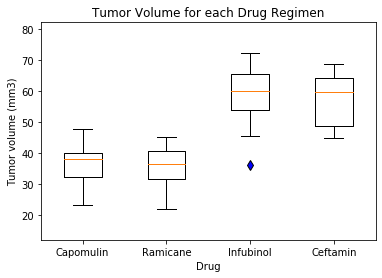

In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
flierprops = {'marker': 'd','markerfacecolor': 'blue','markersize':7}

plt.boxplot(tumor_vol, labels = treatments, flierprops = flierprops)

plt.xlabel('Drug')
plt.ylabel('Tumor volume (mm3)')
plt.title('Tumor Volume for each Drug Regimen')
plt.ylim([minval - 10,maxval + 10])
plt.show()
# You can see the single outlier we calculated above

## Line and Scatter Plots

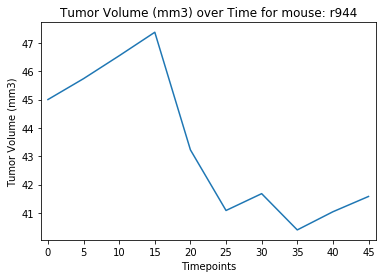

In [37]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# Grab all the mice that were treated with Capomulin
capmice = summative_df.loc[summative_df['Drug Regimen'] == 'Capomulin',:].reset_index()

# Determine the number of unique mice contained
length = capmice['Mouse ID'].unique().size

# Pick one of the ids at random
mouse_id = capmice['Mouse ID'].unique()[random.randint(0,length)]

# Grab the data for this mouse id and then plot (with proper formatting)
mouse_df = capmice.loc[capmice['Mouse ID'] == mouse_id,:]
plt.plot(mouse_df['Timepoint'],mouse_df['Tumor Volume (mm3)'])
plt.title('Tumor Volume (mm3) over Time for mouse: ' + mouse_id)
plt.xlabel('Timepoints')
plt.ylabel('Tumor Volume (mm3)')
plt.xticks(mouse_df['Timepoint'])
plt.xlim([-1,mouse_df['Timepoint'].max() + 1])
plt.show()

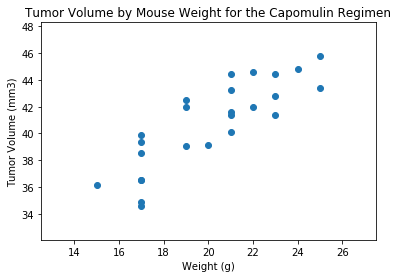

In [16]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capgroup = capmice.groupby('Mouse ID').mean()
plt.scatter(capgroup['Weight (g)'],capgroup['Tumor Volume (mm3)'])

# Add proper formatting to the plot and display it
plt.title('Tumor Volume by Mouse Weight for the Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.xlim([capgroup['Weight (g)'].min() - 2.5,capgroup['Weight (g)'].max() + 2.5])
plt.ylim([capgroup['Tumor Volume (mm3)'].min() - 2.5 ,capgroup['Tumor Volume (mm3)'].max() + 2.5])
plt.show()

## Correlation and Regression

In [17]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(capgroup['Weight (g)'],capgroup['Tumor Volume (mm3)'])
yvals = round(slope,2) * capgroup['Weight (g)'] + round(intercept,2)

line_name = 'Y = ' + str(round(slope,2)) + ' * X' + ' + ' + str(round(intercept,2))

# Display the regression equation
print('Regression Line: ' + line_name)

# Calculate and display the correlation coefficient
corr_coeff = round(sts.pearsonr(capgroup['Weight (g)'],capgroup['Tumor Volume (mm3)'])[0],2)
print('Correlation Coefficient: r = ' + str(corr_coeff))

Regression Line: Y = 0.95 * X + 21.55
Correlation Coefficient: r = 0.84


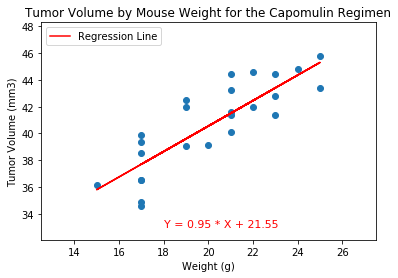

In [18]:
plt.scatter(capgroup['Weight (g)'],capgroup['Tumor Volume (mm3)'])

# Add proper formatting to the plot and display it
plt.title('Tumor Volume by Mouse Weight for the Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.xlim([capgroup['Weight (g)'].min() - 2.5,capgroup['Weight (g)'].max() + 2.5])
plt.ylim([capgroup['Tumor Volume (mm3)'].min() - 2.5 ,capgroup['Tumor Volume (mm3)'].max() + 2.5])
plt.plot(capgroup['Weight (g)'],yvals, color = 'red', label = 'Regression Line')
plt.annotate(line_name, (18,33),fontsize=11,color="red")
plt.legend(loc = 'upper left')
plt.show()